<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b> 
Métodos Numéricos 
</b> </ins> </center> </h1>
    
<h3 style="color:Blue;"> <center> <b> 
Exemplo de "Mundo Real" de Aplicação dos Métodos Estudados
</b></center> </h3>
    
</div>

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info" style="color:Blue;">
Definindo nosso problema
</div>

O crescimento de uma população pode ser modelado por curtos períodos de tempo, supondo que a população cresce continuamente e a uma taxa proporcional ao número de indivíduos presentes naquele instante.

Se supusermos que $N(t)$ denota o número de indivíduos no instante $t$, e $\lambda$, a taxa de natalidade constante da população, então essa população satisfaz a equação diferencial

$$
\dfrac{dN(t)}{dt} = \lambda N(t)
$$

Essa equação pode facilmente ser resolvida por meios analíticos, tendo como solução

$$
N(t) = N_0e^{\lambda t}
$$

em que $N_0$ denota a população no início da contagem de tempo.

__A partir dessa equação, fica fácil, por exemplo, se medirmos a população final, a inicial, saber a taxa de natalidade num dado período de tempo, bastando apenas alguma manipulação analítica "básica"!__

\begin{align}
N(t) &= N_0e^{\lambda t} \\[3mm]
\dfrac{N(t)}{N_0} &= e^{\lambda t} \\[3mm]
\ln\left(\dfrac{N(t)}{N_0}\right) &= \lambda t\\[10mm]
\lambda &= \dfrac{1}{t}\ln\left(\dfrac{N(t)}{N_0}\right)
\end{align}


Como nós temos o período de tempo, tempos as populações inicial e final, conseguimos encontrar diretamente a taxa de natalidade! Jóia!

__Tá, mas qual o problema aqui?__

O problema é que esse modelo é válido apenas quando a população é isolada, sem imigração. Se a imigração é possível, e tiver uma taxa constante $v$, a equação diferencial se torna

$$
\dfrac{dN(t)}{dt} = \lambda N(t) + v
$$

cuja solução é

$$
N(t) = N_0e^{\lambda t} + \dfrac{v}{\lambda}(e^{\lambda t}-1)
$$

E agora não rola resolver analiticamente isolando $\lambda$...

__Nessa horas que entram os métodos numéricos!__

<div class="alert alert-block alert-info" style="color:Blue;">
O exemplo
</div>

Vamos pensar numa situação com dados. Suponha que uma população tenha inicialmente 1 milhão de indivíduos, que 435 mil imigrem para a comunidade analisada no primeiro ano, e que a população, após esse ano, seja de 1564000 indivíduos. Para determinar a taxa de natalidade dessa população, podemos usar o modelo acima, tendo

$$
1564000 = 1000000e^\lambda + \dfrac{435000}{\lambda}(e^\lambda - 1)
$$

Como já sabemos que esse $\lambda$ não sai daí analiticamente, só precisaríamos escrever essa equação acima na forma $f(\lambda) = 0$, ou seja,

$$
f(\lambda) =  1000000e^\lambda + \dfrac{435000}{\lambda}(e^\lambda - 1) - 1564000 = 0
$$

Botando código nas coisas, teríamos

In [2]:
f = lambda x: 1e+6*np.exp(x) + (4.35e+5/x)*(np.exp(x) - 1) - 1.564e+6

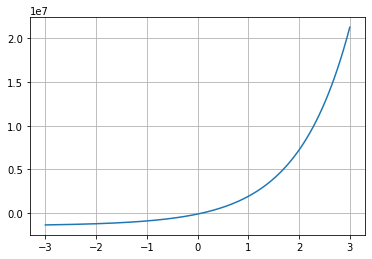

In [3]:
x = np.linspace(-3,3,200)
plt.plot(x,f(x))
plt.grid()

<div class="alert alert-block alert-info" style="color:Blue;">
Resolvendo com o método da Bisseção
</div>

Usando Bisseção, com uma precisão de $10^{-10}$, com intervalo inicial de $[-1,1]$ teríamos

In [ ]:
opt.root_scalar(f,method= 'bisect',bracket=[-1,1], rtol=1e-10).root

NameError: name 'opt' is not defined

De fato, temos um problema de divisão por zero... nossa saída aqui seria a de tirar esse zero do numerador... e podemos, de fato mexer nessa equação analiticamente. Vejamos, se ajustarmos todos para um denominador comum, teremos 

\begin{align}
f(\lambda) &=  1000000e^\lambda + \dfrac{435000}{\lambda}(e^\lambda - 1) - 1564000 = 0 \\[5mm]
f(\lambda)         &= \dfrac{1000000\lambda e^\lambda + 435000(e^\lambda - 1) - 1564000\lambda}{\lambda} = 0\\[5mm]
f(\lambda)           &= 1000000\lambda e^\lambda + 435000(e^\lambda - 1) - 1564000\lambda = 0
\end{align}

Agora, matematicamente, eliminamos a necessidade do $\lambda$ no denominador.

Vamos reescrever a função e testar novamente o método da Bisseção.

In [ ]:
f_ = lambda x: 1e+6*x*np.exp(x) + 4.35e+5*(np.exp(x) - 1) - 1.564e+6*x 

x = np.linspace(-3,3,200)
plt.plot(x,f_(x))
plt.grid()

In [ ]:
opt.root_scalar(f_,method= 'bisect',bracket=[-1,1], rtol=1e-10).root

__E agora??__

Temos de pensar em outros métodos ou buscar outras modificações.

Uma bem simples que temos de pensar é: e porque não mudamos o intervalo?

Por exemplo, $[-1,0.99]$ seria um intervalo válido?

In [ ]:
opt.root_scalar(f,method= 'bisect',bracket=[-1,0.99], rtol=1e-10).root

Nesse caso, vemos que o método converge! E porque? Basta lembrarmos de como o método da bisseção define a aproximação da raiz que está sendo calculada: pelo valor médio! No intervalo $[-1,1]$, o valor médio é 0, o que, de cara, leva a divisão por zero acusada no erro acima. Como agora esse valor médio difere de zero, o algoritmo pode convergir em paz, sem error!